# <font color='green'><b/><center>Hierarchical Clustering Algorithm</center></font>

## <b/> Importing Libraries

In [21]:
import pandas as pd               # For data manipulation
import numpy as np                # For numerical computations
import matplotlib.pyplot as plt  # For plotting graphs
%matplotlib inline

import scipy.cluster.hierarchy as sch     # For hierarchical clustering
from sklearn.cluster import AgglomerativeClustering  # For agglomerative clustering
from sklearn.metrics import silhouette_score         # For silhouette score calculation
from sklearn.preprocessing import normalize         # For data normalization
from sklearn.cluster import KMeans                   # For KMeans clustering

import warnings
warnings.filterwarnings('ignore')  # Ignore warnings

## <b/> Load the Dataset

In [3]:
# Read the CSV file 'Mall_Customers.csv' into a pandas DataFrame
data = pd.read_csv('Mall_Customers.csv')

# Display the first few rows of the dataset
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# Select columns 'Age' and 'Annual Income (k$)' from the DataFrame 'data'
df = data.loc[:, ['Age', 'Annual Income (k$)']]

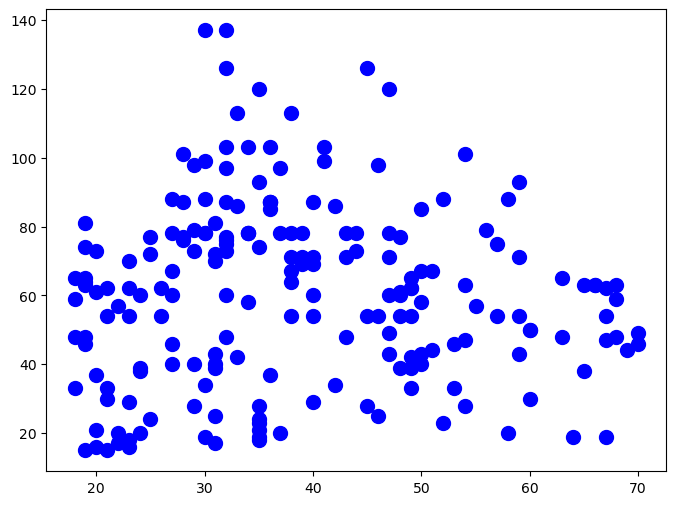

In [6]:
# Create a new figure with a specified size
plt.figure(figsize=(8, 6))

# Scatter plot of 'Age' against 'Annual Income (k$)'
plt.scatter(df[['Age']], df[['Annual Income (k$)']], s=100, c='blue')

## <b/> Hierarchical Clustering

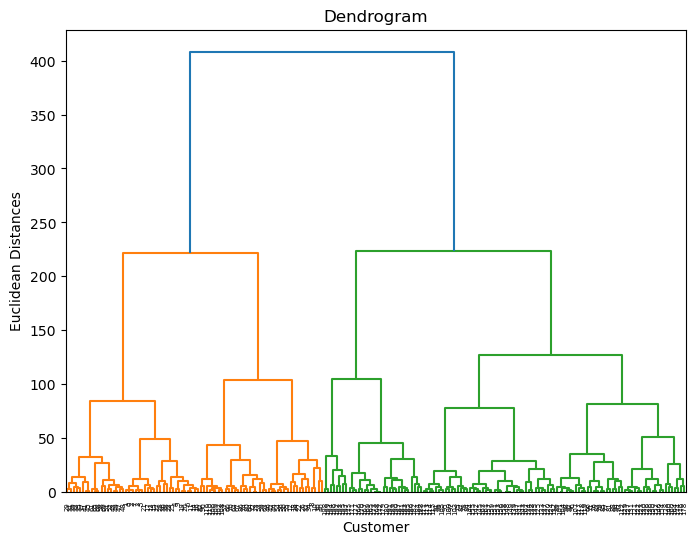

In [8]:
# Create a new figure with a specified size
plt.figure(figsize=(8, 6))

# Generate the dendrogram using hierarchical clustering with the 'ward' method
dendrogram = sch.dendrogram(sch.linkage(df, method='ward'))

# Set the title and labels for the plot
plt.title('Dendrogram')
plt.xlabel('Customer')
plt.ylabel('Euclidean Distances')

# Display the plot
plt.show()

* Check for largest distance vertically without crossing any horizontal line.

In [14]:
# Create an AgglomerativeClustering object with 2 clusters
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')

# Fit the clustering model to the data and predict cluster labels for each data point
cl = cluster.fit_predict(df)

cl

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [16]:
# Calculate the silhouette score
silhouette = silhouette_score(df, cl)

0.4104652474372429

In [17]:
# Convert the DataFrame 'df' to a Numpy array
X = df.values

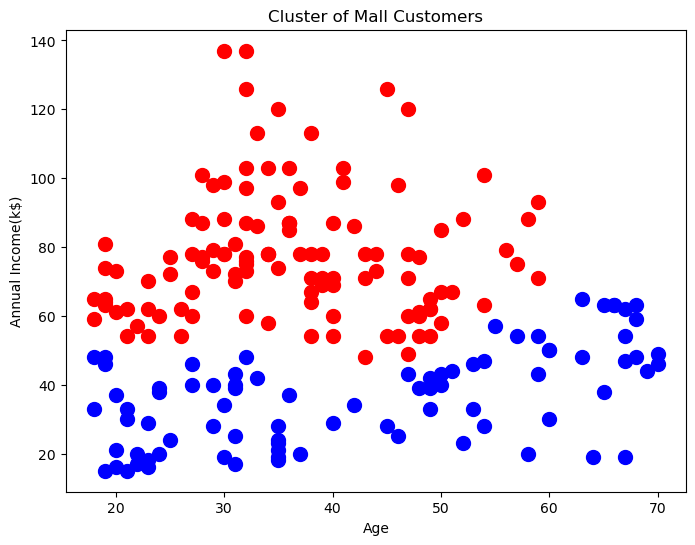

In [18]:
# Create a new figure with a specified size
plt.figure(figsize=(8, 6))

# Scatter plot for points in cluster 0
plt.scatter(X[cl==0, 0], X[cl==0, 1], s=100, c='red', label='Cluster 1')

# Scatter plot for points in cluster 1
plt.scatter(X[cl==1, 0], X[cl==1, 1], s=100, c='blue', label='Cluster 2')

# Set plot title and labels
plt.title('Cluster of Mall Customers')
plt.xlabel('Age')
plt.ylabel('Annual Income(k$)')

# Show legend
plt.legend()

# Display the plot
plt.show()

* Silhouette Score is bad in previous Clustering so, we need to normalize the Age and Annual Income data.

## <b/> Scale the Data

In [20]:
# Normalize the data in the Numpy array X
scaled = normalize(X)

# Convert the normalized data back to a pandas DataFrame
scaled = pd.DataFrame(scaled)

# Display the first few rows of the DataFrame scaled
scaled.head()

,0,1
0,0.784883,0.619644
1,0.813733,0.581238
2,0.780869,0.624695
3,0.820905,0.571064
4,0.876812,0.480833


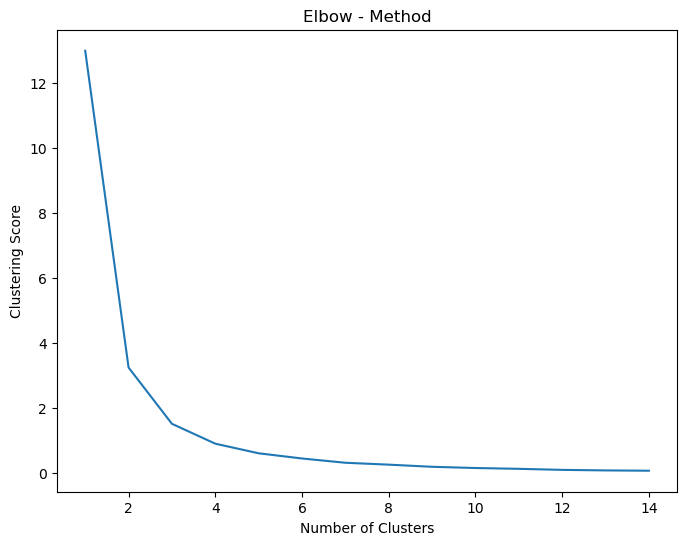

In [24]:
# Initialize an empty list to store the WCSS values
wcss = []

# Iterate over a range of cluster numbers from 1 to 14
for i in range(1, 15):
    # Create a KMeans object with 'i' clusters using random initialization
    kmeans = KMeans(n_clusters=i, init='random', random_state=42)
    
    # Fit the KMeans model to the normalized data
    kmeans.fit(scaled)
    
    # Append the WCSS value to the list
    wcss.append(kmeans.inertia_)

# Create a new figure with a specified size
plt.figure(figsize=(8, 6))

# Plot the number of clusters against the corresponding WCSS values
plt.plot(range(1, 15), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Clustering Score')
plt.show()

In [25]:
# Create a KMeans object with 2 clusters and a fixed random state for reproducibility
kmeans = KMeans(n_clusters=2, random_state=42)

# Fit the KMeans model to the normalized data
kmeans.fit(scaled)

# Predict cluster labels for each data point
pred = kmeans.predict(scaled)

# Display the predicted cluster labels
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [28]:
# Calculate the new silhouette score
silhouette = silhouette_score(scaled, pred)

0.6420367225684405

-----